In [ ]:
import numpy as np
import matplotlib.pyplot as plt

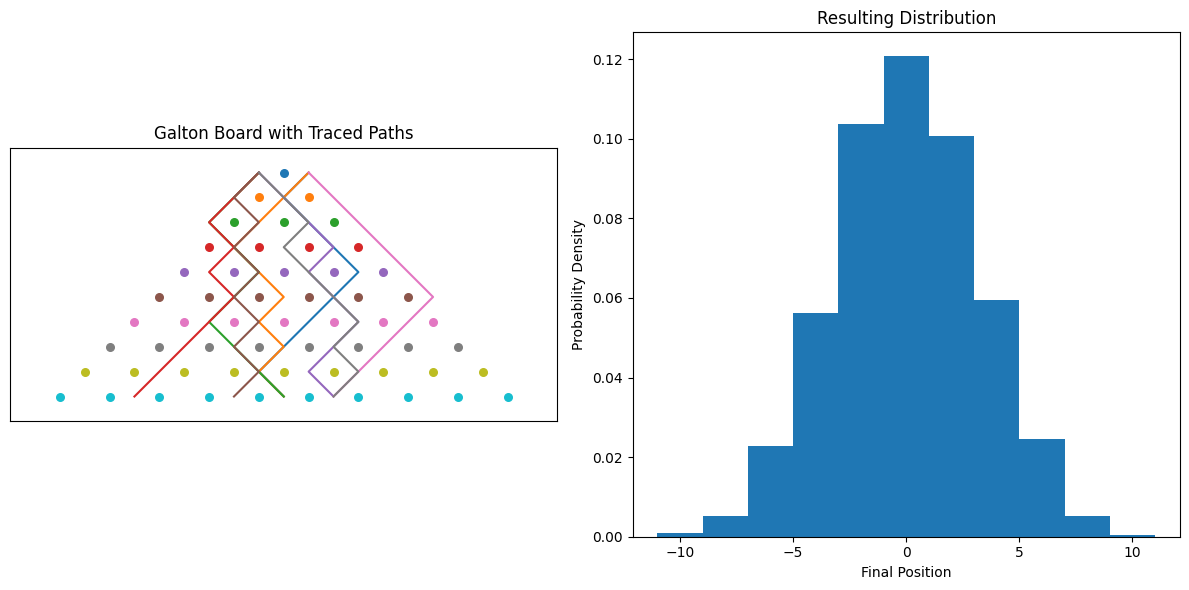

In [1]:
# -----------------------
# Parameters
# -----------------------
n_rows = 10              # Number of peg rows
n_trace = 8              # Number of traced example paths
n_balls = 5000           # Number of balls for distribution

# -----------------------
# Simulate paths
# -----------------------
def simulate_path(n_rows):
    """Simulate one Galton board path."""
    steps = np.random.choice([-1, 1], size=n_rows)
    x_positions = np.cumsum(steps)
    return x_positions

# Traced paths
traced_paths = [simulate_path(n_rows) for _ in range(n_trace)]

# Distribution
end_positions = []
for _ in range(n_balls):
    steps = np.random.choice([-1, 1], size=n_rows)
    end_positions.append(np.sum(steps))
end_positions = np.array(end_positions)

# -----------------------
# Create figure
# -----------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# =======================
# Left panel: Galton board
# =======================
# Draw pegs
for row in range(n_rows):
    x_pegs = np.arange(-row, row + 1, 2)
    y_pegs = np.full_like(x_pegs, n_rows - row)
    ax1.scatter(x_pegs, y_pegs, s=30)

# Draw traced paths
for path in traced_paths:
    y_vals = np.arange(n_rows, 0, -1)
    ax1.plot(path, y_vals)

ax1.set_title("Galton Board with Traced Paths")
ax1.set_xlim(-n_rows - 1, n_rows + 1)
ax1.set_ylim(0, n_rows + 1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_aspect('equal')

# =======================
# Right panel: Distribution
# =======================
bins = np.arange(-n_rows - 1, n_rows + 2, 2)
ax2.hist(end_positions, bins=bins, density=True)

ax2.set_title("Resulting Distribution")
ax2.set_xlabel("Final Position")
ax2.set_ylabel("Probability Density")

plt.tight_layout()
plt.show()
